In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as scy

In [44]:
GM=1.0
class Cuerpo:
  def __init__(self,x0,y0,z0,Vx0,Vy0,Vz0,m0):
    self.m=m0
    self.r=np.array([x0,y0,z0])
    self.rnew=np.array([x0,y0,z0])
    self.V=np.array([Vx0,Vy0,Vz0])
    
  def CalculeFuerza(self):
    aux=-GM*self.m/np.linalg.norm(self.r)**3
    self.F = aux*self.r
      
  def Arranque(self,dt):      
    self.rold = self.r - dt*self.V + (dt**2/2)*self.F
          
  def Muevase(self,dt):
    # self.r = 2*self.r - self.rold + (dt**2)*self.F
    # v = (self.r - self.rold)/(2*dt)
    # self.rold = self.r
     
      
    self.rnew = 2*self.r - self.rold + (dt**2)*self.F
    v = (self.rnew - self.rold)/(2*dt)
    self.rold = self.r
    self.rnew = self.r
      
      

In [48]:
#Condiciones Inicia;es
Deltat=1e-1
Nsteps=int(1e5)
StepsPerFrame=int(1e0)
Nframes=Nsteps//StepsPerFrame
r0 =10

In [49]:
r0=10
omega=np.sqrt(GM/(r0**3))
T=2*np.pi/omega
V0=omega*r0

xdata=np.zeros(Nframes)
ydata=np.zeros(Nframes)
Planeta=Cuerpo(x0=r0,y0=0,z0=0,Vx0=0,Vy0=0.5*V0,Vz0=0,m0=0.453)

Planeta.CalculeFuerza()
Planeta.Arranque(Deltat)


for i in range(Nsteps):
    t=i*Deltat
    # if(i%StepsPerFrame==0):
    #     k = i//StepsPerFrame
    #     xdata[k]=Planeta.r[0]
    #     ydata[k]=Planeta.r[1]
    xdata[i]=Planeta.r[0]
    ydata[i]=Planeta.r[1]
    Planeta.CalculeFuerza()
    Planeta.Muevase(Deltat)

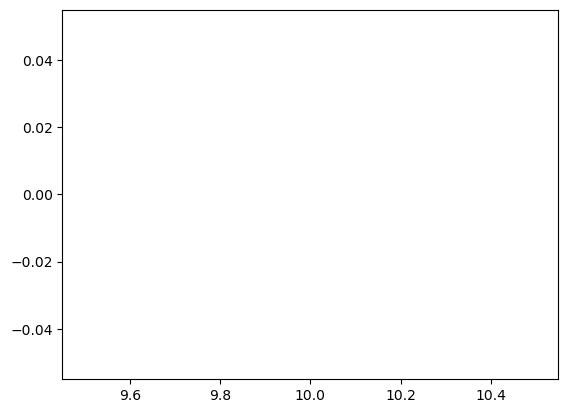

In [50]:
plt.plot(xdata,ydata)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.
C:\Users\cterr\AppData\Local\Temp\ipykernel_11172\179045003.py:10: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)


ValueError: unknown file extension: .mp4

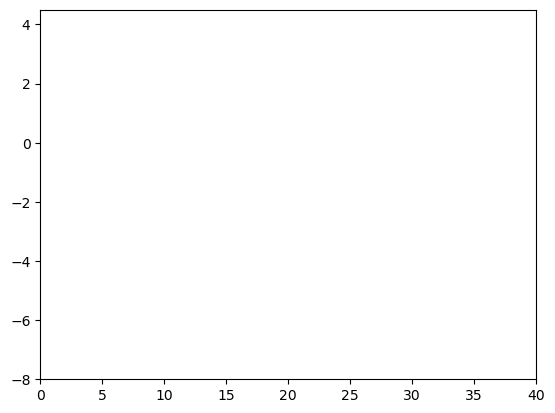

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(0,40), ylim=(-8,4.5))
line, = ax.plot([], [],'o')
def init():
    line.set_data([], [])
    return line,
def animate(i):
    x=xdata[i]
    y=ydata[i]
    line.set_data(x, y)
    return line,
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nsteps, interval=20, blit=False)
anim.save('Planetas.mp4', fps=30)